In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot
import platform
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [2]:
data=pd.read_csv('연령_및_성별_인구__읍면동_2015___시군구_2016__20210320160447.csv',encoding = "cp949",header=1)
idx_drop=data[data['연령별']=='85세이상'].index
data_set=data.drop(idx_drop).reset_index()
data_set=data_set.drop('index',axis=1)

In [3]:
sector=[]
pop=[]
for i in range(1,23,2):
    if i==1: 
        sector.append(data_set['연령별'][i][0:2]+data_set['연령별'][i+1][2:4])
        pop.append(int(data_set['총인구(명)'][i]+data_set['총인구(명)'][i+1]))
    elif i==21:
        sector.append(data_set['연령별'][i])
        pop.append(int(data_set['총인구(명)'][i]))
    else:
        sector.append(data_set['연령별'][i][0:2]+data_set['연령별'][i+1][2:6])
        pop.append(int(data_set['총인구(명)'][i]+data_set['총인구(명)'][i+1]))
total_pop=pd.DataFrame({'연령별':sector,'인구 수(명)':pop})
total_pop['인구비율(%)']=(total_pop['인구 수(명)']/data_set['총인구(명)'][0])*100

,연령별,인구 수(명),인구비율(%)
0,0~9세,4158165,8.030570
1,10~19세,4871356,9.407939
2,20~29세,7026161,13.569465
3,30~39세,7304423,14.106866
4,40~49세,8304629,16.038542
5,50~59세,8608070,16.624570
6,60~69세,6181640,11.938461
7,70~79세,3521769,6.801513
8,80~89세,1586207,3.063406
9,90~99세,211909,0.409255


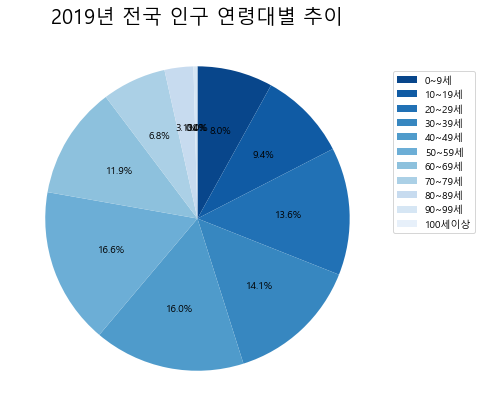

In [20]:
colors = sns.color_palette('Blues_r',len(total_pop['연령별']))
fig = plt.figure(figsize=(7,7))
fig.set_facecolor('white')
ax = fig.add_subplot()
pie = ax.pie(total_pop['인구비율(%)'], startangle=90, counterclock=False, colors=colors, autopct='%1.1f%%')
plt.legend(pie[0],total_pop['연령별'],bbox_to_anchor=(1, 0.9))
plt.title('2019년 전국 인구 연령대별 추이',fontsize=20)
plt.show()